In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
L        = 50.0                
U_stream = 50.0         
Reynold  = 1e4         
kin_vis  = (U_stream * L) / Reynold  

Nx       = 100        
Ny       = 50              
x        = np.linspace(0, L, Nx) 
y_max    = 1
y        = np.linspace(0, y_max, Ny)        
dy       = y_max / (Ny - 1)  

dx       = (dy **2) / (2 * kin_vis)

u        = np.zeros((Nx, Ny))  
v        = np.zeros((Nx, Ny))  
u_new    = np.zeros((Nx,Ny))

u[:, 0]  = U_stream 
u[:, -1] = 0  
v[:, 0]  = 0 
v[0, :]  = 0

In [31]:
def contour(x,y,u):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, u.T, levels=50, cmap='viridis')
    plt.colorbar(label='u')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0,0.5)
    plt.title('Contour Plot')
    plt.show()

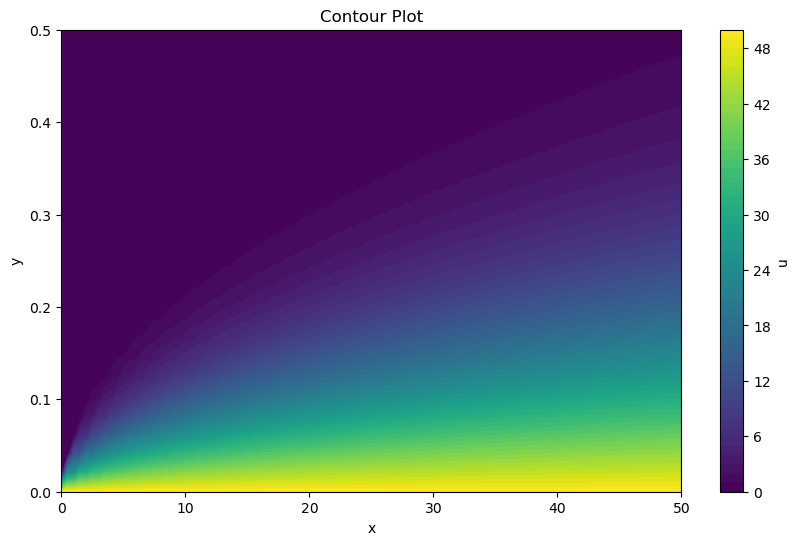

In [32]:
for i in range(1, Nx):
    u_last = u[i-1, :] 

    for j in range(1, Ny-1):
        v[i, j] = v[i, j-1] - (dy / (2 * dx)) * (u[i-1, j] - u_last[j])

        u[i, j] = u_last[j] + dx * (
            -v[i, j] * (u_last[j+1] - u_last[j-1]) / (2 * dy)
            + kin_vis * (u_last[j+1] - 2 * u_last[j] + u_last[j-1]) / dy**2
        )

for i in range(1, Nx):
    for j in range(1, Ny):
        u_new[i, j] = u_new[i-1, j] - v[i, j] * dx

contour(x, y, u)


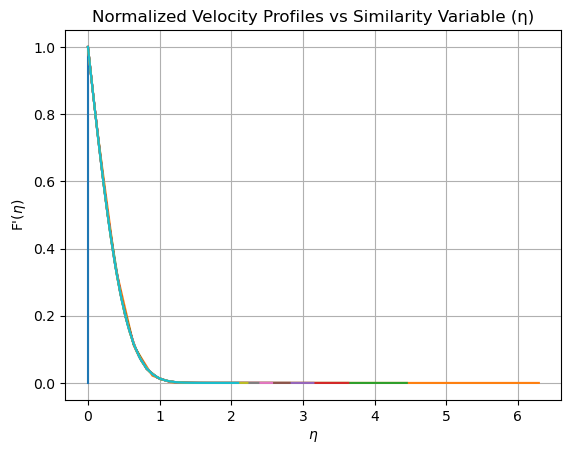

In [38]:
F_prime = np.zeros((Nx, Ny))  
eta = np.zeros((Nx, Ny))  

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        eta[i, j] = yj * np.sqrt(U_stream / (kin_vis * xi)) if xi != 0 else 0  
        F_prime[i, j] = u[i, j] / U_stream  

plt.figure()

for i in range(0, Nx, Nx // 10):
    plt.plot(eta[i, :], F_prime[i, :], label=f'x = {x[i]:.2f} m')

plt.xlabel(r'$\eta$')
plt.ylabel("F'($\eta$)")
plt.title("Normalized Velocity Profiles vs Similarity Variable (η)")
plt.grid(True)

plt.show()